In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 250
generations = int(3000/necoc)
generations

12

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

116


In [7]:
len(number_codes[0])

250

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/250".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/250
number of class1:803
number of class2:814

 ****** Running generation 0 ****** 

Population's average fitness: 0.49725 stdev: 0.06292
Best fitness: 0.73222 - size: (2, 13) - species 3 - id 18
Average adjusted fitness: 0.140
Mean genetic distance 2.893, standard deviation 0.484
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 7.441 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52583 stdev: 0.07625
Best fitness: 0.74644 - size: (3, 14) - species 11 - id 245
Average adjusted fitness: 0.213
Mean genetic distance 2.972, standard deviation 0.469
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.139 sec (7.290 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55145 stdev: 0.06890
Best fitness: 0.74644 - size: (3, 14) - species 11 - id 245
Average adjusted fitness: 0.166
Mean genetic distance 3.067, standard deviation 0.483
Population of 204 members in 35 species


Population's average fitness: 0.52812 stdev: 0.09444
Best fitness: 0.72171 - size: (2, 13) - species 3 - id 78
Average adjusted fitness: 0.209
Mean genetic distance 2.964, standard deviation 0.480
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.776 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55965 stdev: 0.09120
Best fitness: 0.75201 - size: (3, 15) - species 3 - id 332
Average adjusted fitness: 0.239
Mean genetic distance 2.966, standard deviation 0.470
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.410 sec (6.093 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58515 stdev: 0.08553
Best fitness: 0.75201 - size: (3, 15) - species 3 - id 332
Average adjusted fitness: 0.264
Mean genetic distance 3.024, standard deviation 0.491
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.447 sec (6.211 average)

 ****** Running generation 3 ***

Population's average fitness: 0.47562 stdev: 0.09641
Best fitness: 0.70006 - size: (2, 13) - species 4 - id 22
Average adjusted fitness: 0.223
Mean genetic distance 3.007, standard deviation 0.534
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 4.879 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53936 stdev: 0.09526
Best fitness: 0.71305 - size: (3, 15) - species 4 - id 380
Average adjusted fitness: 0.287
Mean genetic distance 3.080, standard deviation 0.508
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 5.492 sec (5.185 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56061 stdev: 0.09662
Best fitness: 0.79035 - size: (4, 16) - species 3 - id 527
Average adjusted fitness: 0.218
Mean genetic distance 3.070, standard deviation 0.502
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 5.469 sec (5.280 average)

 ****** Running generation 3 ***

Population's average fitness: 0.44107 stdev: 0.21279
Best fitness: 0.86395 - size: (2, 13) - species 1 - id 199
Average adjusted fitness: 0.252
Mean genetic distance 2.934, standard deviation 0.480
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 4.775 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56789 stdev: 0.22263
Best fitness: 0.86395 - size: (2, 13) - species 1 - id 199
Average adjusted fitness: 0.349
Mean genetic distance 3.020, standard deviation 0.484
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.069 sec (4.922 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61425 stdev: 0.22337
Best fitness: 0.86395 - size: (2, 13) - species 1 - id 199
Average adjusted fitness: 0.391
Mean genetic distance 3.054, standard deviation 0.487
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.791 sec (5.545 average)

 ****** Running generation 3 **

Population's average fitness: 0.50625 stdev: 0.08916
Best fitness: 0.67965 - size: (2, 13) - species 5 - id 69
Average adjusted fitness: 0.217
Mean genetic distance 2.895, standard deviation 0.470
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.830 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54534 stdev: 0.08483
Best fitness: 0.69079 - size: (3, 15) - species 22 - id 384
Average adjusted fitness: 0.211
Mean genetic distance 3.002, standard deviation 0.487
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.096 sec (4.963 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57425 stdev: 0.07756
Best fitness: 0.74768 - size: (3, 16) - species 15 - id 536
Average adjusted fitness: 0.245
Mean genetic distance 3.076, standard deviation 0.513
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 5.303 sec (5.076 average)

 ****** Running generation 3 *

Population's average fitness: 0.50171 stdev: 0.07782
Best fitness: 0.72109 - size: (2, 13) - species 3 - id 152
Average adjusted fitness: 0.248
Mean genetic distance 2.908, standard deviation 0.469
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 4.709 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53475 stdev: 0.07295
Best fitness: 0.76067 - size: (3, 14) - species 3 - id 359
Average adjusted fitness: 0.260
Mean genetic distance 3.035, standard deviation 0.503
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.033 sec (4.871 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55019 stdev: 0.08486
Best fitness: 0.77675 - size: (3, 15) - species 5 - id 514
Average adjusted fitness: 0.274
Mean genetic distance 3.081, standard deviation 0.490
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 5.397 sec (5.046 average)

 ****** Running generation 3 **

Population's average fitness: 0.49824 stdev: 0.05959
Best fitness: 0.70748 - size: (2, 13) - species 1 - id 44
Average adjusted fitness: 0.181
Mean genetic distance 3.058, standard deviation 0.535
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 4.715 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53188 stdev: 0.06082
Best fitness: 0.71923 - size: (2, 13) - species 33 - id 372
Average adjusted fitness: 0.124
Mean genetic distance 3.085, standard deviation 0.482
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 5.084 sec (4.900 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55228 stdev: 0.06903
Best fitness: 0.74026 - size: (4, 15) - species 38 - id 442
Average adjusted fitness: 0.140
Mean genetic distance 3.090, standard deviation 0.482
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 5.385 sec (5.061 average)

 ****** Running generation 3 *

Population's average fitness: 0.45449 stdev: 0.13562
Best fitness: 0.70192 - size: (2, 13) - species 1 - id 112
Average adjusted fitness: 0.211
Mean genetic distance 2.935, standard deviation 0.471
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 4.758 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54410 stdev: 0.14341
Best fitness: 0.79283 - size: (2, 14) - species 18 - id 332
Average adjusted fitness: 0.246
Mean genetic distance 3.026, standard deviation 0.466
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.042 sec (4.900 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61357 stdev: 0.12657
Best fitness: 0.79283 - size: (2, 14) - species 18 - id 332
Average adjusted fitness: 0.287
Mean genetic distance 3.032, standard deviation 0.488
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.313 sec (5.038 average)

 ****** Running generation 3 

Population's average fitness: 0.52460 stdev: 0.09064
Best fitness: 0.73284 - size: (2, 13) - species 1 - id 184
Average adjusted fitness: 0.217
Mean genetic distance 2.979, standard deviation 0.486
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 4.763 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53986 stdev: 0.09385
Best fitness: 0.73284 - size: (2, 13) - species 1 - id 184
Average adjusted fitness: 0.220
Mean genetic distance 3.084, standard deviation 0.477
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 5.125 sec (4.944 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56591 stdev: 0.08633
Best fitness: 0.73284 - size: (2, 13) - species 32 - id 184
Average adjusted fitness: 0.232
Mean genetic distance 3.074, standard deviation 0.483
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 5.377 sec (5.088 average)

 ****** Running generation 3 *

Population's average fitness: 0.47860 stdev: 0.09663
Best fitness: 0.75943 - size: (2, 13) - species 2 - id 9
Average adjusted fitness: 0.214
Mean genetic distance 2.931, standard deviation 0.486
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 4.726 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53753 stdev: 0.09847
Best fitness: 0.75943 - size: (2, 13) - species 4 - id 9
Average adjusted fitness: 0.242
Mean genetic distance 2.985, standard deviation 0.465
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.158 sec (4.942 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56484 stdev: 0.10283
Best fitness: 0.77860 - size: (4, 17) - species 4 - id 447
Average adjusted fitness: 0.267
Mean genetic distance 2.999, standard deviation 0.455
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 5.356 sec (5.080 average)

 ****** Running generation 3 ******

Population's average fitness: 0.52042 stdev: 0.09125
Best fitness: 0.72727 - size: (2, 13) - species 1 - id 41
Average adjusted fitness: 0.233
Mean genetic distance 2.829, standard deviation 0.478
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 4.804 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55755 stdev: 0.09652
Best fitness: 0.72727 - size: (2, 13) - species 1 - id 41
Average adjusted fitness: 0.255
Mean genetic distance 2.990, standard deviation 0.482
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 5.052 sec (4.928 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56935 stdev: 0.09605
Best fitness: 0.74459 - size: (4, 15) - species 18 - id 491
Average adjusted fitness: 0.276
Mean genetic distance 3.028, standard deviation 0.492
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.332 sec (5.063 average)

 ****** Running generation 3 ***

Population's average fitness: 0.48025 stdev: 0.08467
Best fitness: 0.65430 - size: (2, 13) - species 1 - id 155
Average adjusted fitness: 0.161
Mean genetic distance 2.968, standard deviation 0.482
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 4.749 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52862 stdev: 0.09688
Best fitness: 0.73284 - size: (3, 15) - species 5 - id 326
Average adjusted fitness: 0.241
Mean genetic distance 3.083, standard deviation 0.489
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 5.090 sec (4.920 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55068 stdev: 0.08950
Best fitness: 0.73284 - size: (3, 15) - species 23 - id 326
Average adjusted fitness: 0.197
Mean genetic distance 3.156, standard deviation 0.470
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 5.387 sec (5.075 average)

 ****** Running generation 3 *

Population's average fitness: 0.50141 stdev: 0.05106
Best fitness: 0.64193 - size: (2, 13) - species 3 - id 13
Average adjusted fitness: 0.136
Mean genetic distance 2.946, standard deviation 0.478
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 4.740 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52760 stdev: 0.04787
Best fitness: 0.67100 - size: (2, 14) - species 1 - id 378
Average adjusted fitness: 0.142
Mean genetic distance 3.076, standard deviation 0.486
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 5.107 sec (4.924 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53028 stdev: 0.05946
Best fitness: 0.71676 - size: (4, 16) - species 21 - id 511
Average adjusted fitness: 0.181
Mean genetic distance 3.067, standard deviation 0.497
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 5.352 sec (5.066 average)

 ****** Running generation 3 **

Population's average fitness: 0.47839 stdev: 0.08819
Best fitness: 0.74273 - size: (2, 13) - species 2 - id 155
Average adjusted fitness: 0.194
Mean genetic distance 2.968, standard deviation 0.468
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 4.790 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54038 stdev: 0.09583
Best fitness: 0.74644 - size: (3, 15) - species 1 - id 345
Average adjusted fitness: 0.223
Mean genetic distance 3.049, standard deviation 0.463
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 5.060 sec (4.925 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55112 stdev: 0.10458
Best fitness: 0.77798 - size: (4, 16) - species 25 - id 526
Average adjusted fitness: 0.245
Mean genetic distance 3.107, standard deviation 0.477
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 5.422 sec (5.091 average)

 ****** Running generation 3 *

Population's average fitness: 0.53433 stdev: 0.14578
Best fitness: 0.77489 - size: (2, 13) - species 3 - id 49
Average adjusted fitness: 0.302
Mean genetic distance 2.962, standard deviation 0.469
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 4.775 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60173 stdev: 0.13086
Best fitness: 0.77489 - size: (2, 13) - species 3 - id 49
Average adjusted fitness: 0.334
Mean genetic distance 3.064, standard deviation 0.482
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 5.092 sec (4.934 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63611 stdev: 0.12441
Best fitness: 0.77798 - size: (4, 17) - species 25 - id 519
Average adjusted fitness: 0.374
Mean genetic distance 3.084, standard deviation 0.459
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 5.383 sec (5.083 average)

 ****** Running generation 3 ***

number of class2:967

 ****** Running generation 0 ****** 

Population's average fitness: 0.52219 stdev: 0.09273
Best fitness: 0.71676 - size: (2, 13) - species 1 - id 171
Average adjusted fitness: 0.224
Mean genetic distance 2.954, standard deviation 0.533
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 4.763 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54697 stdev: 0.09208
Best fitness: 0.71676 - size: (2, 13) - species 1 - id 171
Average adjusted fitness: 0.205
Mean genetic distance 3.100, standard deviation 0.557
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 5.025 sec (4.894 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56291 stdev: 0.09412
Best fitness: 0.75881 - size: (3, 14) - species 12 - id 512
Average adjusted fitness: 0.192
Mean genetic distance 3.116, standard deviation 0.552
Population of 201 members in 28 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.50407 stdev: 0.10472
Best fitness: 0.78108 - size: (2, 13) - species 1 - id 72
Average adjusted fitness: 0.350
Mean genetic distance 2.984, standard deviation 0.507
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 4.753 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56456 stdev: 0.10157
Best fitness: 0.81323 - size: (3, 14) - species 23 - id 327
Average adjusted fitness: 0.288
Mean genetic distance 3.094, standard deviation 0.484
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 5.168 sec (4.960 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57631 stdev: 0.11029
Best fitness: 0.81323 - size: (3, 14) - species 23 - id 327
Average adjusted fitness: 0.262
Mean genetic distance 3.142, standard deviation 0.495
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 5.207 sec (5.043 average)

 ****** Running generation 3 *

Population's average fitness: 0.49948 stdev: 0.05979
Best fitness: 0.74954 - size: (2, 13) - species 5 - id 101
Average adjusted fitness: 0.238
Mean genetic distance 2.973, standard deviation 0.488
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 4.788 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53080 stdev: 0.05544
Best fitness: 0.74954 - size: (2, 13) - species 5 - id 101
Average adjusted fitness: 0.196
Mean genetic distance 3.104, standard deviation 0.491
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 5.098 sec (4.943 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53628 stdev: 0.06346
Best fitness: 0.74954 - size: (2, 13) - species 5 - id 101
Average adjusted fitness: 0.124
Mean genetic distance 3.168, standard deviation 0.482
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 5.335 sec (5.073 average)

 ****** Running generation 3 **

Population's average fitness: 0.47294 stdev: 0.08425
Best fitness: 0.68584 - size: (2, 13) - species 4 - id 89
Average adjusted fitness: 0.193
Mean genetic distance 2.984, standard deviation 0.492
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 4.829 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51912 stdev: 0.08859
Best fitness: 0.68584 - size: (2, 13) - species 3 - id 89
Average adjusted fitness: 0.199
Mean genetic distance 3.056, standard deviation 0.498
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 5.569 sec (5.199 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56080 stdev: 0.08335
Best fitness: 0.71243 - size: (3, 15) - species 24 - id 410
Average adjusted fitness: 0.185
Mean genetic distance 3.076, standard deviation 0.496
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.235 sec (5.544 average)

 ****** Running generation 3 ***

Population's average fitness: 0.51766 stdev: 0.08809
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 143
Average adjusted fitness: 0.251
Mean genetic distance 2.908, standard deviation 0.465
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 4.831 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55226 stdev: 0.09566
Best fitness: 0.74521 - size: (2, 14) - species 4 - id 262
Average adjusted fitness: 0.246
Mean genetic distance 2.974, standard deviation 0.484
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.185 sec (5.008 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56748 stdev: 0.09498
Best fitness: 0.74521 - size: (2, 14) - species 4 - id 262
Average adjusted fitness: 0.274
Mean genetic distance 3.035, standard deviation 0.483
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 5.405 sec (5.140 average)

 ****** Running generation 3 **

Population's average fitness: 0.45222 stdev: 0.14083
Best fitness: 0.74273 - size: (2, 13) - species 2 - id 162
Average adjusted fitness: 0.213
Mean genetic distance 2.904, standard deviation 0.458
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 4.814 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55519 stdev: 0.14298
Best fitness: 0.76500 - size: (3, 15) - species 2 - id 361
Average adjusted fitness: 0.286
Mean genetic distance 2.992, standard deviation 0.462
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 5.104 sec (4.959 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59879 stdev: 0.13376
Best fitness: 0.76500 - size: (3, 15) - species 22 - id 361
Average adjusted fitness: 0.301
Mean genetic distance 2.994, standard deviation 0.476
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 5.329 sec (5.082 average)

 ****** Running generation 3 *

Population's average fitness: 0.46669 stdev: 0.09991
Best fitness: 0.72480 - size: (2, 13) - species 2 - id 173
Average adjusted fitness: 0.239
Mean genetic distance 2.941, standard deviation 0.499
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 4.759 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53493 stdev: 0.11590
Best fitness: 0.76314 - size: (3, 14) - species 20 - id 338
Average adjusted fitness: 0.263
Mean genetic distance 3.078, standard deviation 0.528
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 5.131 sec (4.945 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57164 stdev: 0.10319
Best fitness: 0.77242 - size: (4, 15) - species 20 - id 538
Average adjusted fitness: 0.254
Mean genetic distance 3.166, standard deviation 0.522
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 5.369 sec (5.086 average)

 ****** Running generation 3 

Generation time: 6.227 sec (5.870 average)
running:44/250
number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.47717 stdev: 0.08916
Best fitness: 0.69388 - size: (2, 13) - species 5 - id 155
Average adjusted fitness: 0.165
Mean genetic distance 2.910, standard deviation 0.506
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 4.754 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54115 stdev: 0.08806
Best fitness: 0.70686 - size: (2, 12) - species 7 - id 353
Average adjusted fitness: 0.246
Mean genetic distance 3.043, standard deviation 0.489
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 5.114 sec (4.934 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56365 stdev: 0.08462
Best fitness: 0.71614 - size: (3, 14) - species 23 - id 524
Average adjusted fitness: 0.239
Mean genetic distance 3.063, standard deviation 0.

Mean genetic distance 3.122, standard deviation 0.500
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 6.377 sec (6.009 average)
running:46/250
number of class1:644
number of class2:973

 ****** Running generation 0 ****** 

Population's average fitness: 0.51568 stdev: 0.09522
Best fitness: 0.70934 - size: (2, 13) - species 1 - id 120
Average adjusted fitness: 0.252
Mean genetic distance 2.849, standard deviation 0.449
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 5.362 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55638 stdev: 0.09431
Best fitness: 0.74583 - size: (3, 15) - species 22 - id 369
Average adjusted fitness: 0.221
Mean genetic distance 2.923, standard deviation 0.480
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.188 sec (5.275 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56395 stdev: 0.09398
Best fitness: 0.74583 - si

Mean genetic distance 3.134, standard deviation 0.482
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 6.047 sec (5.764 average)
running:48/250
number of class1:487
number of class2:1130

 ****** Running generation 0 ****** 

Population's average fitness: 0.53653 stdev: 0.14979
Best fitness: 0.75943 - size: (2, 13) - species 3 - id 156
Average adjusted fitness: 0.235
Mean genetic distance 2.925, standard deviation 0.496
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 4.787 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61100 stdev: 0.13845
Best fitness: 0.76994 - size: (3, 14) - species 8 - id 238
Average adjusted fitness: 0.394
Mean genetic distance 3.028, standard deviation 0.489
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 5.091 sec (4.939 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61155 stdev: 0.14547
Best fitness: 0.77860 - si

Mean genetic distance 3.234, standard deviation 0.478
Population of 208 members in 47 species
Total extinctions: 0
Generation time: 6.221 sec (6.042 average)
running:50/250
number of class1:973
number of class2:644

 ****** Running generation 0 ****** 

Population's average fitness: 0.48592 stdev: 0.08234
Best fitness: 0.66481 - size: (2, 13) - species 4 - id 90
Average adjusted fitness: 0.153
Mean genetic distance 2.879, standard deviation 0.470
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.496 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52795 stdev: 0.08709
Best fitness: 0.71676 - size: (3, 15) - species 7 - id 342
Average adjusted fitness: 0.231
Mean genetic distance 2.954, standard deviation 0.457
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 5.245 sec (5.371 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54955 stdev: 0.08590
Best fitness: 0.71676 - size

Mean genetic distance 3.200, standard deviation 0.479
Population of 211 members in 47 species
Total extinctions: 0
Generation time: 6.273 sec (6.045 average)
running:52/250
number of class1:1134
number of class2:483

 ****** Running generation 0 ****** 

Population's average fitness: 0.45659 stdev: 0.14502
Best fitness: 0.74335 - size: (2, 13) - species 4 - id 117
Average adjusted fitness: 0.153
Mean genetic distance 2.970, standard deviation 0.487
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 4.869 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55890 stdev: 0.14377
Best fitness: 0.75201 - size: (3, 15) - species 4 - id 366
Average adjusted fitness: 0.282
Mean genetic distance 3.023, standard deviation 0.492
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 5.088 sec (4.979 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60283 stdev: 0.13669
Best fitness: 0.76252 - si


 ****** Running generation 0 ****** 

Population's average fitness: 0.48389 stdev: 0.08611
Best fitness: 0.70501 - size: (2, 13) - species 7 - id 84
Average adjusted fitness: 0.178
Mean genetic distance 2.966, standard deviation 0.496
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 4.835 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54185 stdev: 0.08022
Best fitness: 0.70501 - size: (2, 13) - species 7 - id 84
Average adjusted fitness: 0.203
Mean genetic distance 3.040, standard deviation 0.487
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 5.127 sec (4.981 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56104 stdev: 0.07917
Best fitness: 0.70501 - size: (2, 13) - species 7 - id 84
Average adjusted fitness: 0.182
Mean genetic distance 3.085, standard deviation 0.500
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 5.370 sec (5.111 avera

Population's average fitness: 0.52941 stdev: 0.09185
Best fitness: 0.70006 - size: (2, 13) - species 3 - id 180
Average adjusted fitness: 0.241
Mean genetic distance 2.963, standard deviation 0.493
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 4.878 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53827 stdev: 0.09778
Best fitness: 0.71676 - size: (3, 15) - species 3 - id 265
Average adjusted fitness: 0.194
Mean genetic distance 3.028, standard deviation 0.482
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.107 sec (4.993 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55739 stdev: 0.09495
Best fitness: 0.73531 - size: (4, 17) - species 17 - id 525
Average adjusted fitness: 0.228
Mean genetic distance 3.072, standard deviation 0.494
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 5.344 sec (5.110 average)

 ****** Running generation 3 *

running:58/250
number of class1:646
number of class2:971

 ****** Running generation 0 ****** 

Population's average fitness: 0.52213 stdev: 0.10470
Best fitness: 0.73469 - size: (2, 13) - species 2 - id 20
Average adjusted fitness: 0.308
Mean genetic distance 2.976, standard deviation 0.459
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 4.850 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55540 stdev: 0.11075
Best fitness: 0.79592 - size: (3, 15) - species 2 - id 368
Average adjusted fitness: 0.255
Mean genetic distance 3.073, standard deviation 0.469
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 5.225 sec (5.038 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57824 stdev: 0.10679
Best fitness: 0.79592 - size: (3, 15) - species 2 - id 368
Average adjusted fitness: 0.257
Mean genetic distance 3.056, standard deviation 0.460
Population of 202 members in 45 species
T

Generation time: 6.169 sec (5.953 average)
running:60/250
number of class1:816
number of class2:801

 ****** Running generation 0 ****** 

Population's average fitness: 0.50288 stdev: 0.07380
Best fitness: 0.71923 - size: (2, 13) - species 4 - id 180
Average adjusted fitness: 0.222
Mean genetic distance 2.963, standard deviation 0.490
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 4.916 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54449 stdev: 0.08159
Best fitness: 0.79035 - size: (3, 15) - species 2 - id 341
Average adjusted fitness: 0.208
Mean genetic distance 3.098, standard deviation 0.494
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 5.352 sec (5.134 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54557 stdev: 0.08580
Best fitness: 0.79035 - size: (3, 15) - species 4 - id 341
Average adjusted fitness: 0.244
Mean genetic distance 3.155, standard deviation 0.5

Population's average fitness: 0.46145 stdev: 0.13618
Best fitness: 0.71367 - size: (2, 13) - species 2 - id 27
Average adjusted fitness: 0.226
Mean genetic distance 2.926, standard deviation 0.468
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.867 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57568 stdev: 0.13710
Best fitness: 0.75387 - size: (3, 15) - species 7 - id 362
Average adjusted fitness: 0.309
Mean genetic distance 3.028, standard deviation 0.461
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.217 sec (5.042 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57671 stdev: 0.14797
Best fitness: 0.76994 - size: (3, 16) - species 22 - id 527
Average adjusted fitness: 0.291
Mean genetic distance 3.097, standard deviation 0.503
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 5.538 sec (5.207 average)

 ****** Running generation 3 **

Population's average fitness: 0.53190 stdev: 0.08502
Best fitness: 0.74706 - size: (2, 13) - species 2 - id 20
Average adjusted fitness: 0.237
Mean genetic distance 2.947, standard deviation 0.436
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 4.828 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54856 stdev: 0.10259
Best fitness: 0.74706 - size: (2, 13) - species 6 - id 20
Average adjusted fitness: 0.234
Mean genetic distance 3.059, standard deviation 0.449
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 5.156 sec (4.992 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57156 stdev: 0.09861
Best fitness: 0.75634 - size: (3, 15) - species 14 - id 508
Average adjusted fitness: 0.220
Mean genetic distance 3.080, standard deviation 0.460
Population of 209 members in 35 species
Total extinctions: 0
Generation time: 5.515 sec (5.167 average)

 ****** Running generation 3 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.48515 stdev: 0.09658
Best fitness: 0.70068 - size: (2, 13) - species 1 - id 118
Average adjusted fitness: 0.166
Mean genetic distance 2.896, standard deviation 0.453
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.982 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54477 stdev: 0.09913
Best fitness: 0.81014 - size: (2, 13) - species 20 - id 350
Average adjusted fitness: 0.293
Mean genetic distance 3.004, standard deviation 0.480
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 5.156 sec (5.069 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56136 stdev: 0.11046
Best fitness: 0.81014 - size: (2, 13) - species 20 - id 350
Average adjusted fitness: 0.320
Mean genetic distance 3.026, standard deviation 0.485
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 5.454 sec (5.197 

number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.50754 stdev: 0.07759
Best fitness: 0.71614 - size: (2, 13) - species 3 - id 124
Average adjusted fitness: 0.285
Mean genetic distance 3.064, standard deviation 0.530
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 4.825 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54687 stdev: 0.07533
Best fitness: 0.74892 - size: (2, 13) - species 14 - id 242
Average adjusted fitness: 0.176
Mean genetic distance 3.101, standard deviation 0.509
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 5.205 sec (5.015 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55627 stdev: 0.08289
Best fitness: 0.74892 - size: (2, 13) - species 14 - id 242
Average adjusted fitness: 0.247
Mean genetic distance 3.118, standard deviation 0.523
Population of 204 members in 39 species
Total extinct

number of class2:652

 ****** Running generation 0 ****** 

Population's average fitness: 0.47428 stdev: 0.09476
Best fitness: 0.71800 - size: (2, 13) - species 4 - id 136
Average adjusted fitness: 0.234
Mean genetic distance 3.029, standard deviation 0.507
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 4.862 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52282 stdev: 0.09343
Best fitness: 0.71800 - size: (2, 13) - species 4 - id 136
Average adjusted fitness: 0.187
Mean genetic distance 3.086, standard deviation 0.488
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 5.186 sec (5.024 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54474 stdev: 0.09065
Best fitness: 0.71800 - size: (2, 13) - species 27 - id 136
Average adjusted fitness: 0.217
Mean genetic distance 3.099, standard deviation 0.513
Population of 198 members in 35 species
Total extinctions: 0
Generation tim

Total extinctions: 0
Generation time: 6.048 sec (5.818 average)
running:72/250
number of class1:651
number of class2:966

 ****** Running generation 0 ****** 

Population's average fitness: 0.52313 stdev: 0.08026
Best fitness: 0.72480 - size: (2, 13) - species 5 - id 85
Average adjusted fitness: 0.149
Mean genetic distance 2.982, standard deviation 0.470
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 4.791 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55180 stdev: 0.08504
Best fitness: 0.75387 - size: (3, 14) - species 19 - id 302
Average adjusted fitness: 0.222
Mean genetic distance 3.075, standard deviation 0.493
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 5.162 sec (4.977 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57025 stdev: 0.08591
Best fitness: 0.75387 - size: (3, 14) - species 19 - id 302
Average adjusted fitness: 0.244
Mean genetic distance 3.064, 

Generation time: 6.246 sec (6.164 average)
running:74/250
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.54724 stdev: 0.14881
Best fitness: 0.77427 - size: (2, 13) - species 1 - id 136
Average adjusted fitness: 0.318
Mean genetic distance 2.949, standard deviation 0.481
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 4.850 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61852 stdev: 0.13283
Best fitness: 0.78231 - size: (3, 14) - species 25 - id 370
Average adjusted fitness: 0.327
Mean genetic distance 3.017, standard deviation 0.467
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.180 sec (5.015 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61800 stdev: 0.14168
Best fitness: 0.78788 - size: (2, 13) - species 5 - id 524
Average adjusted fitness: 0.326
Mean genetic distance 3.010, standard deviation 0

running:76/250
number of class1:976
number of class2:641

 ****** Running generation 0 ****** 

Population's average fitness: 0.49171 stdev: 0.11595
Best fitness: 0.79654 - size: (2, 13) - species 4 - id 91
Average adjusted fitness: 0.256
Mean genetic distance 3.002, standard deviation 0.506
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 4.838 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53458 stdev: 0.10946
Best fitness: 0.79654 - size: (2, 13) - species 1 - id 91
Average adjusted fitness: 0.220
Mean genetic distance 3.117, standard deviation 0.522
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 5.212 sec (5.025 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56030 stdev: 0.10816
Best fitness: 0.79654 - size: (2, 13) - species 28 - id 91
Average adjusted fitness: 0.245
Mean genetic distance 3.111, standard deviation 0.517
Population of 201 members in 36 species
To


 ****** Running generation 0 ****** 

Population's average fitness: 0.49903 stdev: 0.04916
Best fitness: 0.63451 - size: (2, 13) - species 2 - id 35
Average adjusted fitness: 0.162
Mean genetic distance 2.908, standard deviation 0.477
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 4.880 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51633 stdev: 0.05345
Best fitness: 0.65801 - size: (2, 13) - species 5 - id 262
Average adjusted fitness: 0.123
Mean genetic distance 3.051, standard deviation 0.480
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 5.609 sec (5.245 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52530 stdev: 0.05312
Best fitness: 0.67223 - size: (3, 14) - species 20 - id 528
Average adjusted fitness: 0.145
Mean genetic distance 3.047, standard deviation 0.501
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.495 sec (5.328 av

Population's average fitness: 0.48430 stdev: 0.09974
Best fitness: 0.73902 - size: (2, 13) - species 2 - id 82
Average adjusted fitness: 0.315
Mean genetic distance 2.930, standard deviation 0.525
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 4.853 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55611 stdev: 0.10384
Best fitness: 0.78664 - size: (2, 13) - species 6 - id 307
Average adjusted fitness: 0.342
Mean genetic distance 3.047, standard deviation 0.501
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 5.159 sec (5.006 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56019 stdev: 0.11168
Best fitness: 0.78973 - size: (4, 17) - species 6 - id 537
Average adjusted fitness: 0.218
Mean genetic distance 3.087, standard deviation 0.489
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 5.455 sec (5.156 average)

 ****** Running generation 3 ***

Population's average fitness: 0.47385 stdev: 0.14831
Best fitness: 0.73408 - size: (2, 13) - species 1 - id 62
Average adjusted fitness: 0.316
Mean genetic distance 2.949, standard deviation 0.504
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 4.833 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54372 stdev: 0.14787
Best fitness: 0.78602 - size: (3, 15) - species 4 - id 331
Average adjusted fitness: 0.291
Mean genetic distance 3.021, standard deviation 0.477
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.151 sec (4.992 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59249 stdev: 0.14818
Best fitness: 0.78602 - size: (3, 15) - species 4 - id 331
Average adjusted fitness: 0.379
Mean genetic distance 3.054, standard deviation 0.456
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 5.345 sec (5.110 average)

 ****** Running generation 3 ***

Population's average fitness: 0.44611 stdev: 0.21029
Best fitness: 0.80519 - size: (2, 13) - species 1 - id 136
Average adjusted fitness: 0.263
Mean genetic distance 2.829, standard deviation 0.451
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.869 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57728 stdev: 0.20959
Best fitness: 0.84539 - size: (3, 15) - species 8 - id 292
Average adjusted fitness: 0.377
Mean genetic distance 2.943, standard deviation 0.485
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.874 sec (5.371 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62426 stdev: 0.21486
Best fitness: 0.84539 - size: (3, 15) - species 23 - id 292
Average adjusted fitness: 0.424
Mean genetic distance 3.002, standard deviation 0.495
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.342 sec (5.695 average)

 ****** Running generation 3 *

Population's average fitness: 0.49885 stdev: 0.08034
Best fitness: 0.75325 - size: (2, 13) - species 1 - id 140
Average adjusted fitness: 0.201
Mean genetic distance 2.907, standard deviation 0.488
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 4.851 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53239 stdev: 0.07541
Best fitness: 0.75325 - size: (2, 13) - species 5 - id 140
Average adjusted fitness: 0.250
Mean genetic distance 3.042, standard deviation 0.484
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 5.247 sec (5.049 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54559 stdev: 0.08074
Best fitness: 0.75325 - size: (2, 13) - species 26 - id 140
Average adjusted fitness: 0.263
Mean genetic distance 3.062, standard deviation 0.474
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 5.456 sec (5.185 average)

 ****** Running generation 3 *

number of class1:1134
number of class2:483

 ****** Running generation 0 ****** 

Population's average fitness: 0.45117 stdev: 0.14420
Best fitness: 0.72171 - size: (2, 13) - species 2 - id 6
Average adjusted fitness: 0.241
Mean genetic distance 2.906, standard deviation 0.473
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 4.869 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54835 stdev: 0.15007
Best fitness: 0.75634 - size: (3, 13) - species 18 - id 335
Average adjusted fitness: 0.284
Mean genetic distance 3.057, standard deviation 0.484
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 5.180 sec (5.025 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59096 stdev: 0.14243
Best fitness: 0.75758 - size: (4, 14) - species 1 - id 532
Average adjusted fitness: 0.306
Mean genetic distance 3.122, standard deviation 0.455
Population of 205 members in 40 species
Total extinctio

Population's average fitness: 0.49735 stdev: 0.09487
Best fitness: 0.74706 - size: (2, 13) - species 3 - id 129
Average adjusted fitness: 0.195
Mean genetic distance 2.921, standard deviation 0.460
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.828 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53424 stdev: 0.08841
Best fitness: 0.74706 - size: (2, 13) - species 3 - id 129
Average adjusted fitness: 0.205
Mean genetic distance 3.020, standard deviation 0.475
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 5.216 sec (5.022 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55316 stdev: 0.09079
Best fitness: 0.74706 - size: (2, 13) - species 16 - id 129
Average adjusted fitness: 0.244
Mean genetic distance 2.995, standard deviation 0.473
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 5.330 sec (5.125 average)

 ****** Running generation 3 *

running:92/250
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.46470 stdev: 0.09917
Best fitness: 0.74768 - size: (2, 13) - species 5 - id 67
Average adjusted fitness: 0.240
Mean genetic distance 3.007, standard deviation 0.485
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 4.871 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53014 stdev: 0.09482
Best fitness: 0.75448 - size: (3, 15) - species 4 - id 333
Average adjusted fitness: 0.255
Mean genetic distance 3.062, standard deviation 0.493
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 5.165 sec (5.018 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56113 stdev: 0.09478
Best fitness: 0.76252 - size: (3, 15) - species 5 - id 518
Average adjusted fitness: 0.273
Mean genetic distance 3.063, standard deviation 0.484
Population of 200 members in 37 species
T

running:94/250
number of class1:806
number of class2:811

 ****** Running generation 0 ****** 

Population's average fitness: 0.49608 stdev: 0.06155
Best fitness: 0.72047 - size: (2, 13) - species 7 - id 127
Average adjusted fitness: 0.196
Mean genetic distance 2.953, standard deviation 0.496
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 4.875 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52192 stdev: 0.06280
Best fitness: 0.74397 - size: (3, 15) - species 18 - id 293
Average adjusted fitness: 0.190
Mean genetic distance 3.039, standard deviation 0.489
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.139 sec (5.007 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54274 stdev: 0.07165
Best fitness: 0.74397 - size: (3, 15) - species 18 - id 293
Average adjusted fitness: 0.239
Mean genetic distance 3.082, standard deviation 0.467
Population of 201 members in 36 specie

Total extinctions: 0
Generation time: 6.169 sec (5.873 average)
running:96/250
number of class1:646
number of class2:971

 ****** Running generation 0 ****** 

Population's average fitness: 0.52305 stdev: 0.08925
Best fitness: 0.72913 - size: (2, 13) - species 2 - id 120
Average adjusted fitness: 0.247
Mean genetic distance 2.921, standard deviation 0.462
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.873 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56438 stdev: 0.08108
Best fitness: 0.72913 - size: (2, 13) - species 4 - id 120
Average adjusted fitness: 0.240
Mean genetic distance 2.970, standard deviation 0.457
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 5.232 sec (5.052 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56602 stdev: 0.08819
Best fitness: 0.72913 - size: (2, 13) - species 5 - id 120
Average adjusted fitness: 0.293
Mean genetic distance 3.011, s

Mean genetic distance 3.168, standard deviation 0.482
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 6.174 sec (5.811 average)
running:98/250
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.50586 stdev: 0.06297
Best fitness: 0.72727 - size: (2, 13) - species 3 - id 192
Average adjusted fitness: 0.246
Mean genetic distance 2.966, standard deviation 0.482
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 4.963 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53350 stdev: 0.06844
Best fitness: 0.72727 - size: (2, 13) - species 7 - id 192
Average adjusted fitness: 0.253
Mean genetic distance 3.060, standard deviation 0.484
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 5.506 sec (5.234 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55060 stdev: 0.06878
Best fitness: 0.72727 - siz

Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.289 sec (5.996 average)
running:100/250
number of class1:489
number of class2:1128

 ****** Running generation 0 ****** 

Population's average fitness: 0.52729 stdev: 0.15705
Best fitness: 0.77675 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.318
Mean genetic distance 2.863, standard deviation 0.464
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 4.889 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60582 stdev: 0.14804
Best fitness: 0.83488 - size: (3, 15) - species 18 - id 360
Average adjusted fitness: 0.352
Mean genetic distance 2.954, standard deviation 0.455
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 5.191 sec (5.040 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62784 stdev: 0.14712
Best fitness: 0.83488 - size: (3, 15) - species 18 - id 360
Average adjusted fit

Total extinctions: 0
Generation time: 5.941 sec (6.210 average)
running:102/250
number of class1:652
number of class2:965

 ****** Running generation 0 ****** 

Population's average fitness: 0.51246 stdev: 0.08965
Best fitness: 0.68336 - size: (2, 13) - species 5 - id 136
Average adjusted fitness: 0.227
Mean genetic distance 2.923, standard deviation 0.502
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 4.919 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55110 stdev: 0.09133
Best fitness: 0.70501 - size: (2, 14) - species 2 - id 241
Average adjusted fitness: 0.234
Mean genetic distance 2.994, standard deviation 0.491
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.219 sec (5.069 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55730 stdev: 0.10208
Best fitness: 0.73222 - size: (4, 17) - species 24 - id 527
Average adjusted fitness: 0.299
Mean genetic distance 2.982,

number of class1:322
number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.56049 stdev: 0.20194
Best fitness: 0.80458 - size: (2, 13) - species 4 - id 95
Average adjusted fitness: 0.387
Mean genetic distance 2.960, standard deviation 0.500
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 4.932 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.66300 stdev: 0.19520
Best fitness: 0.84292 - size: (3, 15) - species 10 - id 219
Average adjusted fitness: 0.482
Mean genetic distance 3.066, standard deviation 0.504
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.210 sec (5.071 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69160 stdev: 0.18798
Best fitness: 0.84292 - size: (3, 15) - species 10 - id 219
Average adjusted fitness: 0.517
Mean genetic distance 3.105, standard deviation 0.504
Population of 201 members in 29 species
Total extinct

Population's average fitness: 0.50361 stdev: 0.07013
Best fitness: 0.71243 - size: (2, 13) - species 5 - id 185
Average adjusted fitness: 0.249
Mean genetic distance 2.928, standard deviation 0.473
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.140 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53020 stdev: 0.07501
Best fitness: 0.75881 - size: (3, 14) - species 2 - id 337
Average adjusted fitness: 0.223
Mean genetic distance 3.016, standard deviation 0.469
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 5.309 sec (5.224 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53576 stdev: 0.08165
Best fitness: 0.75881 - size: (3, 14) - species 23 - id 337
Average adjusted fitness: 0.318
Mean genetic distance 3.090, standard deviation 0.472
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 5.584 sec (5.344 average)

 ****** Running generation 3 *

Population's average fitness: 0.47541 stdev: 0.08226
Best fitness: 0.66667 - size: (2, 13) - species 1 - id 40
Average adjusted fitness: 0.163
Mean genetic distance 2.980, standard deviation 0.505
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 4.908 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53101 stdev: 0.08728
Best fitness: 0.72171 - size: (2, 14) - species 12 - id 244
Average adjusted fitness: 0.241
Mean genetic distance 3.039, standard deviation 0.490
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.235 sec (5.072 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55427 stdev: 0.08324
Best fitness: 0.72171 - size: (2, 14) - species 12 - id 244
Average adjusted fitness: 0.183
Mean genetic distance 3.007, standard deviation 0.490
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 5.388 sec (5.177 average)

 ****** Running generation 3 *

Population's average fitness: 0.46169 stdev: 0.15472
Best fitness: 0.81509 - size: (2, 13) - species 4 - id 69
Average adjusted fitness: 0.267
Mean genetic distance 2.942, standard deviation 0.467
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 4.889 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55674 stdev: 0.16147
Best fitness: 0.81509 - size: (2, 13) - species 4 - id 69
Average adjusted fitness: 0.337
Mean genetic distance 3.049, standard deviation 0.481
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 5.302 sec (5.095 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59057 stdev: 0.16339
Best fitness: 0.82870 - size: (4, 17) - species 4 - id 529
Average adjusted fitness: 0.380
Mean genetic distance 3.118, standard deviation 0.485
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 5.519 sec (5.237 average)

 ****** Running generation 3 ****

Population's average fitness: 0.47980 stdev: 0.08696
Best fitness: 0.67223 - size: (2, 13) - species 2 - id 6
Average adjusted fitness: 0.184
Mean genetic distance 2.988, standard deviation 0.485
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 4.853 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54178 stdev: 0.08766
Best fitness: 0.69821 - size: (3, 14) - species 19 - id 300
Average adjusted fitness: 0.179
Mean genetic distance 3.103, standard deviation 0.486
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 5.198 sec (5.025 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55546 stdev: 0.08881
Best fitness: 0.69821 - size: (3, 14) - species 19 - id 300
Average adjusted fitness: 0.232
Mean genetic distance 3.149, standard deviation 0.484
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 5.438 sec (5.163 average)

 ****** Running generation 3 **

Population's average fitness: 0.53593 stdev: 0.20392
Best fitness: 0.82313 - size: (2, 13) - species 2 - id 157
Average adjusted fitness: 0.377
Mean genetic distance 2.941, standard deviation 0.476
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 4.851 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63978 stdev: 0.19829
Best fitness: 0.82437 - size: (3, 15) - species 2 - id 346
Average adjusted fitness: 0.426
Mean genetic distance 3.063, standard deviation 0.471
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 5.272 sec (5.061 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67389 stdev: 0.19073
Best fitness: 0.88002 - size: (4, 16) - species 2 - id 535
Average adjusted fitness: 0.478
Mean genetic distance 3.133, standard deviation 0.465
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 5.480 sec (5.201 average)

 ****** Running generation 3 **

Population's average fitness: 0.46833 stdev: 0.14523
Best fitness: 0.75263 - size: (2, 13) - species 2 - id 91
Average adjusted fitness: 0.265
Mean genetic distance 2.993, standard deviation 0.506
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 4.912 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57976 stdev: 0.15540
Best fitness: 0.78602 - size: (3, 15) - species 1 - id 360
Average adjusted fitness: 0.337
Mean genetic distance 3.102, standard deviation 0.487
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.322 sec (5.117 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60884 stdev: 0.14753
Best fitness: 0.79283 - size: (3, 17) - species 6 - id 441
Average adjusted fitness: 0.316
Mean genetic distance 3.118, standard deviation 0.480
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 5.524 sec (5.253 average)

 ****** Running generation 3 ***

Population's average fitness: 0.52130 stdev: 0.08778
Best fitness: 0.72480 - size: (2, 13) - species 5 - id 25
Average adjusted fitness: 0.216
Mean genetic distance 2.969, standard deviation 0.503
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 4.947 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57245 stdev: 0.07384
Best fitness: 0.72480 - size: (2, 13) - species 5 - id 25
Average adjusted fitness: 0.228
Mean genetic distance 3.034, standard deviation 0.520
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 5.199 sec (5.073 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55505 stdev: 0.08664
Best fitness: 0.72480 - size: (2, 13) - species 5 - id 25
Average adjusted fitness: 0.184
Mean genetic distance 3.081, standard deviation 0.518
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 5.424 sec (5.190 average)

 ****** Running generation 3 *****

number of class1:641
number of class2:976

 ****** Running generation 0 ****** 

Population's average fitness: 0.51582 stdev: 0.08302
Best fitness: 0.66481 - size: (2, 13) - species 1 - id 147
Average adjusted fitness: 0.215
Mean genetic distance 2.934, standard deviation 0.501
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 4.883 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55737 stdev: 0.08408
Best fitness: 0.72294 - size: (3, 14) - species 19 - id 337
Average adjusted fitness: 0.219
Mean genetic distance 3.032, standard deviation 0.510
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 5.198 sec (5.040 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55959 stdev: 0.08608
Best fitness: 0.73779 - size: (3, 15) - species 19 - id 534
Average adjusted fitness: 0.192
Mean genetic distance 3.070, standard deviation 0.539
Population of 200 members in 28 species
Total extinct

Population's average fitness: 0.46717 stdev: 0.14139
Best fitness: 0.75634 - size: (2, 13) - species 5 - id 147
Average adjusted fitness: 0.248
Mean genetic distance 2.941, standard deviation 0.452
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 4.867 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54503 stdev: 0.14883
Best fitness: 0.76190 - size: (3, 14) - species 18 - id 319
Average adjusted fitness: 0.296
Mean genetic distance 3.026, standard deviation 0.465
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 5.244 sec (5.055 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57985 stdev: 0.14029
Best fitness: 0.77551 - size: (4, 17) - species 5 - id 504
Average adjusted fitness: 0.310
Mean genetic distance 3.064, standard deviation 0.481
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 5.459 sec (5.190 average)

 ****** Running generation 3 *

Population's average fitness: 0.45246 stdev: 0.14611
Best fitness: 0.81694 - size: (2, 13) - species 3 - id 128
Average adjusted fitness: 0.251
Mean genetic distance 2.968, standard deviation 0.506
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 4.860 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56730 stdev: 0.15748
Best fitness: 0.81694 - size: (2, 13) - species 2 - id 128
Average adjusted fitness: 0.325
Mean genetic distance 3.051, standard deviation 0.489
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.203 sec (5.031 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57972 stdev: 0.15800
Best fitness: 0.81694 - size: (2, 13) - species 20 - id 128
Average adjusted fitness: 0.339
Mean genetic distance 3.098, standard deviation 0.489
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 5.501 sec (5.188 average)

 ****** Running generation 3 *

running:126/250
number of class1:483
number of class2:1134

 ****** Running generation 0 ****** 

Population's average fitness: 0.52782 stdev: 0.15772
Best fitness: 0.79839 - size: (2, 13) - species 3 - id 89
Average adjusted fitness: 0.287
Mean genetic distance 2.987, standard deviation 0.519
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 4.924 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59839 stdev: 0.15942
Best fitness: 0.84725 - size: (3, 14) - species 22 - id 317
Average adjusted fitness: 0.340
Mean genetic distance 3.078, standard deviation 0.493
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 5.178 sec (5.051 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63197 stdev: 0.14651
Best fitness: 0.84725 - size: (3, 14) - species 22 - id 317
Average adjusted fitness: 0.363
Mean genetic distance 3.047, standard deviation 0.518
Population of 204 members in 39 speci

Population's average fitness: 0.49120 stdev: 0.06427
Best fitness: 0.71861 - size: (2, 13) - species 1 - id 125
Average adjusted fitness: 0.166
Mean genetic distance 2.893, standard deviation 0.463
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 4.901 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53569 stdev: 0.06789
Best fitness: 0.71861 - size: (2, 13) - species 1 - id 125
Average adjusted fitness: 0.161
Mean genetic distance 2.937, standard deviation 0.445
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 5.239 sec (5.070 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54444 stdev: 0.07486
Best fitness: 0.73222 - size: (3, 16) - species 1 - id 535
Average adjusted fitness: 0.220
Mean genetic distance 2.956, standard deviation 0.464
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 5.527 sec (5.222 average)

 ****** Running generation 3 **

Population's average fitness: 0.49819 stdev: 0.05055
Best fitness: 0.63884 - size: (2, 13) - species 2 - id 18
Average adjusted fitness: 0.161
Mean genetic distance 2.949, standard deviation 0.476
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 4.929 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51878 stdev: 0.05147
Best fitness: 0.65182 - size: (2, 13) - species 1 - id 257
Average adjusted fitness: 0.132
Mean genetic distance 3.056, standard deviation 0.497
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 5.246 sec (5.087 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52635 stdev: 0.05249
Best fitness: 0.65430 - size: (2, 14) - species 1 - id 530
Average adjusted fitness: 0.160
Mean genetic distance 3.079, standard deviation 0.479
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 5.497 sec (5.224 average)

 ****** Running generation 3 ***

Population's average fitness: 0.48989 stdev: 0.09189
Best fitness: 0.70563 - size: (2, 13) - species 3 - id 41
Average adjusted fitness: 0.196
Mean genetic distance 2.943, standard deviation 0.488
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 4.913 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53425 stdev: 0.09101
Best fitness: 0.72913 - size: (3, 15) - species 18 - id 297
Average adjusted fitness: 0.259
Mean genetic distance 3.140, standard deviation 0.484
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 5.336 sec (5.124 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56273 stdev: 0.08258
Best fitness: 0.72913 - size: (3, 15) - species 18 - id 297
Average adjusted fitness: 0.232
Mean genetic distance 3.174, standard deviation 0.468
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 5.480 sec (5.243 average)

 ****** Running generation 3 *

running:134/250
number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.49674 stdev: 0.05515
Best fitness: 0.67842 - size: (2, 13) - species 5 - id 41
Average adjusted fitness: 0.172
Mean genetic distance 2.885, standard deviation 0.461
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 4.936 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52832 stdev: 0.05916
Best fitness: 0.67965 - size: (2, 14) - species 8 - id 332
Average adjusted fitness: 0.175
Mean genetic distance 3.050, standard deviation 0.449
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 5.251 sec (5.094 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54008 stdev: 0.06054
Best fitness: 0.70686 - size: (3, 15) - species 24 - id 515
Average adjusted fitness: 0.143
Mean genetic distance 3.069, standard deviation 0.450
Population of 203 members in 41 species

running:136/250
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.49119 stdev: 0.05760
Best fitness: 0.71490 - size: (2, 13) - species 2 - id 165
Average adjusted fitness: 0.179
Mean genetic distance 2.961, standard deviation 0.481
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 4.987 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52530 stdev: 0.05888
Best fitness: 0.71490 - size: (2, 13) - species 2 - id 165
Average adjusted fitness: 0.188
Mean genetic distance 3.016, standard deviation 0.493
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.176 sec (5.081 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54178 stdev: 0.06369
Best fitness: 0.71985 - size: (4, 17) - species 4 - id 511
Average adjusted fitness: 0.167
Mean genetic distance 3.078, standard deviation 0.516
Population of 202 members in 29 species

Population's average fitness: 0.48079 stdev: 0.09691
Best fitness: 0.76067 - size: (2, 13) - species 2 - id 120
Average adjusted fitness: 0.220
Mean genetic distance 2.931, standard deviation 0.451
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.888 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52424 stdev: 0.10968
Best fitness: 0.77613 - size: (3, 15) - species 28 - id 378
Average adjusted fitness: 0.344
Mean genetic distance 3.023, standard deviation 0.461
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 5.180 sec (5.034 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55299 stdev: 0.10746
Best fitness: 0.77613 - size: (3, 15) - species 28 - id 378
Average adjusted fitness: 0.255
Mean genetic distance 3.068, standard deviation 0.465
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 5.479 sec (5.182 average)

 ****** Running generation 3 

Population's average fitness: 0.50085 stdev: 0.05539
Best fitness: 0.66543 - size: (2, 13) - species 4 - id 36
Average adjusted fitness: 0.169
Mean genetic distance 2.935, standard deviation 0.471
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 4.849 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52786 stdev: 0.06198
Best fitness: 0.71861 - size: (3, 14) - species 20 - id 324
Average adjusted fitness: 0.212
Mean genetic distance 3.029, standard deviation 0.493
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.597 sec (5.223 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53704 stdev: 0.06195
Best fitness: 0.71861 - size: (3, 14) - species 20 - id 324
Average adjusted fitness: 0.175
Mean genetic distance 3.047, standard deviation 0.524
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 5.591 sec (5.346 average)

 ****** Running generation 3 *

Population's average fitness: 0.49619 stdev: 0.04541
Best fitness: 0.62894 - size: (2, 13) - species 5 - id 133
Average adjusted fitness: 0.153
Mean genetic distance 2.931, standard deviation 0.473
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 4.866 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51890 stdev: 0.04990
Best fitness: 0.66110 - size: (2, 14) - species 6 - id 314
Average adjusted fitness: 0.134
Mean genetic distance 3.022, standard deviation 0.484
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.178 sec (5.022 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53426 stdev: 0.05053
Best fitness: 0.66110 - size: (3, 14) - species 24 - id 447
Average adjusted fitness: 0.141
Mean genetic distance 3.016, standard deviation 0.480
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 5.303 sec (5.116 average)

 ****** Running generation 3 *

Population's average fitness: 0.51762 stdev: 0.08480
Best fitness: 0.67656 - size: (2, 13) - species 1 - id 39
Average adjusted fitness: 0.193
Mean genetic distance 2.869, standard deviation 0.442
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.870 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56225 stdev: 0.08405
Best fitness: 0.70439 - size: (3, 14) - species 9 - id 204
Average adjusted fitness: 0.213
Mean genetic distance 2.989, standard deviation 0.467
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 5.228 sec (5.049 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56106 stdev: 0.09263
Best fitness: 0.70439 - size: (3, 14) - species 9 - id 204
Average adjusted fitness: 0.218
Mean genetic distance 3.029, standard deviation 0.483
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 5.487 sec (5.195 average)

 ****** Running generation 3 ***

Population's average fitness: 0.46022 stdev: 0.15260
Best fitness: 0.76067 - size: (2, 13) - species 3 - id 78
Average adjusted fitness: 0.257
Mean genetic distance 2.920, standard deviation 0.504
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 4.896 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55197 stdev: 0.15387
Best fitness: 0.76067 - size: (2, 13) - species 3 - id 78
Average adjusted fitness: 0.288
Mean genetic distance 2.998, standard deviation 0.478
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 5.185 sec (5.041 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60429 stdev: 0.13832
Best fitness: 0.81076 - size: (3, 15) - species 4 - id 477
Average adjusted fitness: 0.305
Mean genetic distance 3.046, standard deviation 0.499
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 5.498 sec (5.193 average)

 ****** Running generation 3 ****

Population's average fitness: 0.47938 stdev: 0.07946
Best fitness: 0.65306 - size: (2, 13) - species 4 - id 35
Average adjusted fitness: 0.167
Mean genetic distance 2.990, standard deviation 0.482
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.927 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52745 stdev: 0.08486
Best fitness: 0.72233 - size: (3, 15) - species 6 - id 385
Average adjusted fitness: 0.155
Mean genetic distance 3.079, standard deviation 0.472
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 5.277 sec (5.102 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54092 stdev: 0.08434
Best fitness: 0.72233 - size: (3, 15) - species 6 - id 385
Average adjusted fitness: 0.172
Mean genetic distance 3.098, standard deviation 0.453
Population of 209 members in 42 species
Total extinctions: 0
Generation time: 5.541 sec (5.248 average)

 ****** Running generation 3 ***

Population's average fitness: 0.47527 stdev: 0.09557
Best fitness: 0.67038 - size: (2, 13) - species 2 - id 131
Average adjusted fitness: 0.175
Mean genetic distance 2.961, standard deviation 0.489
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 4.863 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52869 stdev: 0.09659
Best fitness: 0.71490 - size: (3, 15) - species 4 - id 324
Average adjusted fitness: 0.243
Mean genetic distance 3.055, standard deviation 0.486
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.157 sec (5.010 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54604 stdev: 0.09075
Best fitness: 0.71490 - size: (3, 15) - species 4 - id 324
Average adjusted fitness: 0.210
Mean genetic distance 3.044, standard deviation 0.484
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 5.355 sec (5.125 average)

 ****** Running generation 3 **

Population's average fitness: 0.49641 stdev: 0.05963
Best fitness: 0.67656 - size: (2, 13) - species 1 - id 185
Average adjusted fitness: 0.169
Mean genetic distance 2.901, standard deviation 0.492
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 4.887 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52614 stdev: 0.06488
Best fitness: 0.68151 - size: (3, 15) - species 15 - id 310
Average adjusted fitness: 0.177
Mean genetic distance 2.928, standard deviation 0.488
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 5.149 sec (5.018 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53783 stdev: 0.06638
Best fitness: 0.70996 - size: (4, 16) - species 1 - id 418
Average adjusted fitness: 0.139
Mean genetic distance 2.998, standard deviation 0.495
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 5.404 sec (5.147 average)

 ****** Running generation 3 *

Population's average fitness: 0.46883 stdev: 0.07330
Best fitness: 0.66357 - size: (2, 13) - species 3 - id 28
Average adjusted fitness: 0.164
Mean genetic distance 2.947, standard deviation 0.498
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 4.844 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52009 stdev: 0.08075
Best fitness: 0.67223 - size: (3, 15) - species 2 - id 225
Average adjusted fitness: 0.219
Mean genetic distance 3.015, standard deviation 0.503
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.160 sec (5.002 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55313 stdev: 0.07906
Best fitness: 0.68893 - size: (3, 15) - species 3 - id 488
Average adjusted fitness: 0.165
Mean genetic distance 3.078, standard deviation 0.501
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 5.373 sec (5.126 average)

 ****** Running generation 3 ***

Population's average fitness: 0.48161 stdev: 0.10127
Best fitness: 0.74954 - size: (2, 13) - species 7 - id 159
Average adjusted fitness: 0.234
Mean genetic distance 2.904, standard deviation 0.514
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 4.884 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54426 stdev: 0.09870
Best fitness: 0.77427 - size: (3, 14) - species 10 - id 220
Average adjusted fitness: 0.213
Mean genetic distance 3.029, standard deviation 0.535
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.230 sec (5.057 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56822 stdev: 0.10796
Best fitness: 0.80087 - size: (3, 14) - species 3 - id 505
Average adjusted fitness: 0.299
Mean genetic distance 3.070, standard deviation 0.523
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.478 sec (5.197 average)

 ****** Running generation 3 *

Population's average fitness: 0.43475 stdev: 0.20062
Best fitness: 0.80210 - size: (2, 13) - species 2 - id 35
Average adjusted fitness: 0.232
Mean genetic distance 2.940, standard deviation 0.490
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.890 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59761 stdev: 0.21529
Best fitness: 0.84168 - size: (2, 14) - species 1 - id 300
Average adjusted fitness: 0.354
Mean genetic distance 3.107, standard deviation 0.498
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 5.167 sec (5.028 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64726 stdev: 0.20778
Best fitness: 0.84168 - size: (2, 14) - species 12 - id 300
Average adjusted fitness: 0.456
Mean genetic distance 3.136, standard deviation 0.484
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 5.458 sec (5.172 average)

 ****** Running generation 3 **

Population's average fitness: 0.48173 stdev: 0.08254
Best fitness: 0.68151 - size: (2, 13) - species 3 - id 49
Average adjusted fitness: 0.129
Mean genetic distance 2.946, standard deviation 0.484
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.002 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53183 stdev: 0.08654
Best fitness: 0.71985 - size: (2, 14) - species 15 - id 267
Average adjusted fitness: 0.201
Mean genetic distance 3.113, standard deviation 0.511
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 5.263 sec (5.133 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55431 stdev: 0.08672
Best fitness: 0.71985 - size: (2, 14) - species 15 - id 267
Average adjusted fitness: 0.193
Mean genetic distance 3.126, standard deviation 0.515
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 5.266 sec (5.177 average)

 ****** Running generation 3 *

number of class2:651

 ****** Running generation 0 ****** 

Population's average fitness: 0.48458 stdev: 0.08561
Best fitness: 0.66296 - size: (2, 13) - species 4 - id 94
Average adjusted fitness: 0.183
Mean genetic distance 2.985, standard deviation 0.558
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 4.940 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52034 stdev: 0.08997
Best fitness: 0.66790 - size: (2, 13) - species 2 - id 343
Average adjusted fitness: 0.208
Mean genetic distance 3.067, standard deviation 0.547
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 5.208 sec (5.074 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54085 stdev: 0.08724
Best fitness: 0.71119 - size: (4, 17) - species 24 - id 460
Average adjusted fitness: 0.227
Mean genetic distance 3.055, standard deviation 0.530
Population of 205 members in 29 species
Total extinctions: 0
Generation time

Population's average fitness: 0.47973 stdev: 0.09603
Best fitness: 0.77056 - size: (2, 13) - species 1 - id 133
Average adjusted fitness: 0.237
Mean genetic distance 2.917, standard deviation 0.475
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 4.915 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55362 stdev: 0.09446
Best fitness: 0.77056 - size: (2, 13) - species 1 - id 133
Average adjusted fitness: 0.249
Mean genetic distance 3.038, standard deviation 0.492
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.219 sec (5.067 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56253 stdev: 0.10198
Best fitness: 0.77922 - size: (3, 15) - species 9 - id 499
Average adjusted fitness: 0.221
Mean genetic distance 3.075, standard deviation 0.493
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 5.410 sec (5.181 average)

 ****** Running generation 3 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.47204 stdev: 0.08867
Best fitness: 0.67471 - size: (2, 13) - species 3 - id 96
Average adjusted fitness: 0.203
Mean genetic distance 2.893, standard deviation 0.488
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 4.908 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53709 stdev: 0.09205
Best fitness: 0.67965 - size: (2, 14) - species 7 - id 309
Average adjusted fitness: 0.193
Mean genetic distance 3.106, standard deviation 0.516
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 5.185 sec (5.046 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56843 stdev: 0.08048
Best fitness: 0.71181 - size: (3, 15) - species 2 - id 494
Average adjusted fitness: 0.217
Mean genetic distance 3.168, standard deviation 0.501
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 5.286 sec (5.126 ave

Population's average fitness: 0.46386 stdev: 0.15455
Best fitness: 0.76129 - size: (2, 13) - species 3 - id 174
Average adjusted fitness: 0.224
Mean genetic distance 2.988, standard deviation 0.516
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.886 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56139 stdev: 0.15266
Best fitness: 0.76747 - size: (3, 15) - species 3 - id 376
Average adjusted fitness: 0.317
Mean genetic distance 3.086, standard deviation 0.501
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.193 sec (5.040 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58607 stdev: 0.14937
Best fitness: 0.79221 - size: (3, 15) - species 5 - id 469
Average adjusted fitness: 0.330
Mean genetic distance 3.053, standard deviation 0.482
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 5.401 sec (5.160 average)

 ****** Running generation 3 **

Population's average fitness: 0.50064 stdev: 0.06723
Best fitness: 0.79035 - size: (2, 13) - species 5 - id 18
Average adjusted fitness: 0.233
Mean genetic distance 2.972, standard deviation 0.464
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 4.868 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53648 stdev: 0.07467
Best fitness: 0.79716 - size: (3, 15) - species 16 - id 283
Average adjusted fitness: 0.197
Mean genetic distance 3.030, standard deviation 0.469
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 5.334 sec (5.101 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55386 stdev: 0.08462
Best fitness: 0.82870 - size: (3, 15) - species 15 - id 464
Average adjusted fitness: 0.218
Mean genetic distance 3.072, standard deviation 0.444
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 5.493 sec (5.232 average)

 ****** Running generation 3 *

number of class1:482
number of class2:1135

 ****** Running generation 0 ****** 

Population's average fitness: 0.52608 stdev: 0.13628
Best fitness: 0.70996 - size: (2, 13) - species 2 - id 85
Average adjusted fitness: 0.240
Mean genetic distance 3.021, standard deviation 0.514
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 4.969 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59077 stdev: 0.13944
Best fitness: 0.71923 - size: (2, 11) - species 11 - id 211
Average adjusted fitness: 0.341
Mean genetic distance 3.139, standard deviation 0.530
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 5.223 sec (5.096 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61498 stdev: 0.13087
Best fitness: 0.72233 - size: (3, 15) - species 11 - id 481
Average adjusted fitness: 0.308
Mean genetic distance 3.158, standard deviation 0.516
Population of 200 members in 37 species
Total extinct

running:174/250
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.49901 stdev: 0.04839
Best fitness: 0.67965 - size: (2, 13) - species 7 - id 53
Average adjusted fitness: 0.175
Mean genetic distance 3.011, standard deviation 0.492
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.608 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52596 stdev: 0.05896
Best fitness: 0.71923 - size: (2, 13) - species 7 - id 266
Average adjusted fitness: 0.159
Mean genetic distance 3.075, standard deviation 0.486
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 5.940 sec (5.774 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53778 stdev: 0.06422
Best fitness: 0.71923 - size: (2, 13) - species 7 - id 266
Average adjusted fitness: 0.137
Mean genetic distance 3.111, standard deviation 0.480
Population of 201 members in 40 species


Population's average fitness: 0.45500 stdev: 0.14729
Best fitness: 0.82066 - size: (2, 13) - species 4 - id 97
Average adjusted fitness: 0.238
Mean genetic distance 2.885, standard deviation 0.462
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 4.950 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55486 stdev: 0.15000
Best fitness: 0.82066 - size: (2, 13) - species 4 - id 97
Average adjusted fitness: 0.281
Mean genetic distance 2.993, standard deviation 0.440
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 5.223 sec (5.087 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58574 stdev: 0.15115
Best fitness: 0.82313 - size: (4, 17) - species 4 - id 534
Average adjusted fitness: 0.266
Mean genetic distance 3.030, standard deviation 0.420
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 5.461 sec (5.212 average)

 ****** Running generation 3 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.47814 stdev: 0.14747
Best fitness: 0.76933 - size: (2, 13) - species 2 - id 194
Average adjusted fitness: 0.175
Mean genetic distance 2.969, standard deviation 0.453
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 4.946 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55294 stdev: 0.15030
Best fitness: 0.76933 - size: (2, 13) - species 3 - id 194
Average adjusted fitness: 0.295
Mean genetic distance 3.047, standard deviation 0.451
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 5.457 sec (5.202 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59403 stdev: 0.14056
Best fitness: 0.76933 - size: (2, 13) - species 31 - id 194
Average adjusted fitness: 0.320
Mean genetic distance 3.057, standard deviation 0.471
Population of 210 members in 42 species
Total extinctions: 0
Generation time: 5.518 sec (5.307 a

Population's average fitness: 0.50276 stdev: 0.04500
Best fitness: 0.62956 - size: (2, 13) - species 4 - id 158
Average adjusted fitness: 0.146
Mean genetic distance 3.002, standard deviation 0.545
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 4.872 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51568 stdev: 0.04305
Best fitness: 0.62956 - size: (2, 13) - species 4 - id 158
Average adjusted fitness: 0.112
Mean genetic distance 3.125, standard deviation 0.535
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.177 sec (5.024 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52145 stdev: 0.04247
Best fitness: 0.64750 - size: (4, 16) - species 18 - id 523
Average adjusted fitness: 0.126
Mean genetic distance 3.135, standard deviation 0.525
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 5.361 sec (5.136 average)

 ****** Running generation 3 *


 ****** Running generation 0 ****** 

Population's average fitness: 0.43052 stdev: 0.20591
Best fitness: 0.81014 - size: (2, 13) - species 1 - id 61
Average adjusted fitness: 0.242
Mean genetic distance 2.959, standard deviation 0.483
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 4.844 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56272 stdev: 0.21382
Best fitness: 0.82746 - size: (3, 14) - species 3 - id 235
Average adjusted fitness: 0.392
Mean genetic distance 3.007, standard deviation 0.475
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.175 sec (5.010 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65669 stdev: 0.18627
Best fitness: 0.85714 - size: (3, 15) - species 9 - id 514
Average adjusted fitness: 0.461
Mean genetic distance 3.024, standard deviation 0.453
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 5.422 sec (5.147 ave

running:184/250
number of class1:645
number of class2:972

 ****** Running generation 0 ****** 

Population's average fitness: 0.51829 stdev: 0.08962
Best fitness: 0.69264 - size: (2, 13) - species 5 - id 195
Average adjusted fitness: 0.207
Mean genetic distance 2.910, standard deviation 0.443
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.827 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55701 stdev: 0.08254
Best fitness: 0.69264 - size: (2, 13) - species 5 - id 195
Average adjusted fitness: 0.223
Mean genetic distance 3.028, standard deviation 0.452
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 5.221 sec (5.024 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55987 stdev: 0.08955
Best fitness: 0.70872 - size: (4, 17) - species 40 - id 510
Average adjusted fitness: 0.213
Mean genetic distance 3.024, standard deviation 0.464
Population of 199 members in 42 specie

Population's average fitness: 0.53658 stdev: 0.14656
Best fitness: 0.74397 - size: (2, 13) - species 3 - id 11
Average adjusted fitness: 0.316
Mean genetic distance 3.036, standard deviation 0.469
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 4.815 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61982 stdev: 0.13322
Best fitness: 0.76685 - size: (3, 14) - species 27 - id 349
Average adjusted fitness: 0.343
Mean genetic distance 3.027, standard deviation 0.480
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 5.161 sec (4.988 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63097 stdev: 0.12878
Best fitness: 0.76685 - size: (3, 14) - species 27 - id 349
Average adjusted fitness: 0.347
Mean genetic distance 2.975, standard deviation 0.475
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.312 sec (5.096 average)

 ****** Running generation 3 *

Population's average fitness: 0.49449 stdev: 0.05814
Best fitness: 0.65244 - size: (2, 13) - species 2 - id 51
Average adjusted fitness: 0.149
Mean genetic distance 2.972, standard deviation 0.437
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 4.862 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53136 stdev: 0.06410
Best fitness: 0.69388 - size: (2, 13) - species 30 - id 374
Average adjusted fitness: 0.134
Mean genetic distance 3.017, standard deviation 0.421
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 5.248 sec (5.055 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55308 stdev: 0.07298
Best fitness: 0.75015 - size: (2, 13) - species 36 - id 499
Average adjusted fitness: 0.195
Mean genetic distance 3.015, standard deviation 0.436
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 5.629 sec (5.246 average)

 ****** Running generation 3 *

number of class1:1455
number of class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.42028 stdev: 0.27246
Best fitness: 0.89981 - size: (2, 13) - species 6 - id 36
Average adjusted fitness: 0.382
Mean genetic distance 2.996, standard deviation 0.539
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.842 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61623 stdev: 0.28319
Best fitness: 0.90538 - size: (3, 15) - species 2 - id 226
Average adjusted fitness: 0.478
Mean genetic distance 3.028, standard deviation 0.519
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 5.187 sec (5.014 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67775 stdev: 0.26621
Best fitness: 0.91033 - size: (3, 15) - species 15 - id 415
Average adjusted fitness: 0.532
Mean genetic distance 3.081, standard deviation 0.488
Population of 197 members in 33 species
Total extincti

Population's average fitness: 0.50888 stdev: 0.07418
Best fitness: 0.74644 - size: (2, 13) - species 4 - id 43
Average adjusted fitness: 0.196
Mean genetic distance 2.986, standard deviation 0.464
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 4.850 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53963 stdev: 0.08116
Best fitness: 0.75943 - size: (3, 15) - species 2 - id 386
Average adjusted fitness: 0.217
Mean genetic distance 3.055, standard deviation 0.462
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 5.136 sec (4.993 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56082 stdev: 0.08594
Best fitness: 0.77613 - size: (4, 16) - species 2 - id 516
Average adjusted fitness: 0.292
Mean genetic distance 3.085, standard deviation 0.492
Population of 206 members in 45 species
Total extinctions: 0
Generation time: 5.426 sec (5.137 average)

 ****** Running generation 3 ***

number of class1:1131
number of class2:486

 ****** Running generation 0 ****** 

Population's average fitness: 0.47300 stdev: 0.15326
Best fitness: 0.73531 - size: (2, 13) - species 1 - id 42
Average adjusted fitness: 0.216
Mean genetic distance 2.921, standard deviation 0.511
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 4.854 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59096 stdev: 0.14758
Best fitness: 0.77118 - size: (3, 15) - species 4 - id 333
Average adjusted fitness: 0.345
Mean genetic distance 3.044, standard deviation 0.490
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 5.119 sec (4.986 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58912 stdev: 0.15890
Best fitness: 0.77180 - size: (4, 16) - species 1 - id 516
Average adjusted fitness: 0.351
Mean genetic distance 3.095, standard deviation 0.491
Population of 202 members in 32 species
Total extinctio

Population's average fitness: 0.52029 stdev: 0.09515
Best fitness: 0.72233 - size: (2, 13) - species 8 - id 122
Average adjusted fitness: 0.245
Mean genetic distance 2.924, standard deviation 0.486
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 4.849 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55277 stdev: 0.09468
Best fitness: 0.75572 - size: (2, 14) - species 18 - id 285
Average adjusted fitness: 0.210
Mean genetic distance 3.011, standard deviation 0.475
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.261 sec (5.055 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56530 stdev: 0.09384
Best fitness: 0.75572 - size: (2, 14) - species 1 - id 285
Average adjusted fitness: 0.194
Mean genetic distance 3.016, standard deviation 0.485
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.413 sec (5.174 average)

 ****** Running generation 3 *

Population's average fitness: 0.49706 stdev: 0.04982
Best fitness: 0.62276 - size: (2, 13) - species 5 - id 172
Average adjusted fitness: 0.196
Mean genetic distance 2.982, standard deviation 0.533
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.796 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52774 stdev: 0.04878
Best fitness: 0.69017 - size: (2, 13) - species 5 - id 359
Average adjusted fitness: 0.147
Mean genetic distance 3.055, standard deviation 0.522
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.110 sec (4.953 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53721 stdev: 0.06304
Best fitness: 0.72975 - size: (4, 15) - species 5 - id 530
Average adjusted fitness: 0.201
Mean genetic distance 3.114, standard deviation 0.510
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 5.323 sec (5.077 average)

 ****** Running generation 3 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.46410 stdev: 0.15089
Best fitness: 0.76500 - size: (2, 13) - species 1 - id 7
Average adjusted fitness: 0.270
Mean genetic distance 2.905, standard deviation 0.462
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 4.757 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55830 stdev: 0.16151
Best fitness: 0.79592 - size: (3, 13) - species 24 - id 374
Average adjusted fitness: 0.287
Mean genetic distance 3.059, standard deviation 0.478
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 5.729 sec (5.243 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60687 stdev: 0.14175
Best fitness: 0.79592 - size: (3, 13) - species 24 - id 374
Average adjusted fitness: 0.311
Mean genetic distance 3.066, standard deviation 0.484
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 5.322 sec (5.269 av

Population's average fitness: 0.47399 stdev: 0.08157
Best fitness: 0.68089 - size: (2, 13) - species 2 - id 34
Average adjusted fitness: 0.198
Mean genetic distance 3.008, standard deviation 0.475
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 4.863 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53189 stdev: 0.09030
Best fitness: 0.71861 - size: (3, 15) - species 27 - id 380
Average adjusted fitness: 0.218
Mean genetic distance 3.114, standard deviation 0.468
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 5.419 sec (5.141 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54899 stdev: 0.09377
Best fitness: 0.74521 - size: (4, 16) - species 27 - id 528
Average adjusted fitness: 0.252
Mean genetic distance 3.212, standard deviation 0.499
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 5.487 sec (5.256 average)

 ****** Running generation 3 *

Population's average fitness: 0.47165 stdev: 0.08658
Best fitness: 0.67161 - size: (2, 13) - species 5 - id 160
Average adjusted fitness: 0.181
Mean genetic distance 2.850, standard deviation 0.439
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.785 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53858 stdev: 0.08684
Best fitness: 0.71058 - size: (2, 13) - species 2 - id 315
Average adjusted fitness: 0.205
Mean genetic distance 2.933, standard deviation 0.459
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.027 sec (4.906 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56381 stdev: 0.08470
Best fitness: 0.71614 - size: (3, 15) - species 14 - id 530
Average adjusted fitness: 0.216
Mean genetic distance 3.016, standard deviation 0.490
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 5.235 sec (5.016 average)

 ****** Running generation 3 *

Population's average fitness: 0.48496 stdev: 0.09051
Best fitness: 0.71490 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.146
Mean genetic distance 2.937, standard deviation 0.498
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 4.843 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53303 stdev: 0.09329
Best fitness: 0.72294 - size: (3, 15) - species 9 - id 299
Average adjusted fitness: 0.195
Mean genetic distance 3.089, standard deviation 0.505
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 5.161 sec (5.002 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54900 stdev: 0.08818
Best fitness: 0.72294 - size: (3, 15) - species 9 - id 299
Average adjusted fitness: 0.165
Mean genetic distance 3.146, standard deviation 0.494
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 5.425 sec (5.143 average)

 ****** Running generation 3 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.51751 stdev: 0.10838
Best fitness: 0.73840 - size: (2, 13) - species 3 - id 105
Average adjusted fitness: 0.316
Mean genetic distance 2.959, standard deviation 0.494
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.736 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55387 stdev: 0.10917
Best fitness: 0.76933 - size: (2, 13) - species 14 - id 294
Average adjusted fitness: 0.276
Mean genetic distance 3.056, standard deviation 0.493
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 5.240 sec (4.988 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58194 stdev: 0.10822
Best fitness: 0.78169 - size: (4, 17) - species 14 - id 499
Average adjusted fitness: 0.251
Mean genetic distance 3.100, standard deviation 0.488
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 5.409 sec (5.128 


 ****** Running generation 0 ****** 

Population's average fitness: 0.48232 stdev: 0.09397
Best fitness: 0.70563 - size: (2, 13) - species 4 - id 45
Average adjusted fitness: 0.183
Mean genetic distance 3.002, standard deviation 0.449
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 4.782 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53383 stdev: 0.09513
Best fitness: 0.74088 - size: (3, 15) - species 32 - id 379
Average adjusted fitness: 0.260
Mean genetic distance 3.096, standard deviation 0.465
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 5.093 sec (4.938 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55910 stdev: 0.09235
Best fitness: 0.74088 - size: (3, 15) - species 4 - id 379
Average adjusted fitness: 0.213
Mean genetic distance 3.103, standard deviation 0.465
Population of 209 members in 43 species
Total extinctions: 0
Generation time: 5.447 sec (5.108 av


 ****** Running generation 0 ****** 

Population's average fitness: 0.54480 stdev: 0.16028
Best fitness: 0.85714 - size: (2, 13) - species 2 - id 109
Average adjusted fitness: 0.339
Mean genetic distance 2.882, standard deviation 0.434
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 4.810 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63094 stdev: 0.13721
Best fitness: 0.85714 - size: (2, 13) - species 7 - id 109
Average adjusted fitness: 0.403
Mean genetic distance 3.006, standard deviation 0.452
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.106 sec (4.958 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62461 stdev: 0.16302
Best fitness: 0.86456 - size: (2, 13) - species 28 - id 509
Average adjusted fitness: 0.460
Mean genetic distance 3.063, standard deviation 0.461
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 5.305 sec (5.074 a

Generation time: 6.148 sec (5.995 average)
running:214/250
number of class1:642
number of class2:975

 ****** Running generation 0 ****** 

Population's average fitness: 0.51556 stdev: 0.08463
Best fitness: 0.67842 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.243
Mean genetic distance 2.927, standard deviation 0.465
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.745 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55454 stdev: 0.08160
Best fitness: 0.68522 - size: (3, 14) - species 1 - id 375
Average adjusted fitness: 0.233
Mean genetic distance 2.988, standard deviation 0.475
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.091 sec (4.918 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55652 stdev: 0.08429
Best fitness: 0.70996 - size: (4, 16) - species 1 - id 542
Average adjusted fitness: 0.200
Mean genetic distance 3.049, standard deviation 0.49

Population's average fitness: 0.53475 stdev: 0.07906
Best fitness: 0.68831 - size: (2, 13) - species 4 - id 16
Average adjusted fitness: 0.230
Mean genetic distance 2.992, standard deviation 0.514
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 4.749 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55271 stdev: 0.09120
Best fitness: 0.70068 - size: (3, 15) - species 18 - id 302
Average adjusted fitness: 0.241
Mean genetic distance 3.087, standard deviation 0.530
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 5.083 sec (4.916 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56989 stdev: 0.08621
Best fitness: 0.73593 - size: (3, 13) - species 24 - id 516
Average adjusted fitness: 0.181
Mean genetic distance 3.106, standard deviation 0.541
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 5.206 sec (5.013 average)

 ****** Running generation 3 *

Population's average fitness: 0.48542 stdev: 0.10327
Best fitness: 0.74088 - size: (2, 13) - species 4 - id 184
Average adjusted fitness: 0.252
Mean genetic distance 2.970, standard deviation 0.503
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 4.778 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54729 stdev: 0.09613
Best fitness: 0.75819 - size: (3, 14) - species 9 - id 267
Average adjusted fitness: 0.290
Mean genetic distance 3.053, standard deviation 0.532
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 5.162 sec (4.970 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56548 stdev: 0.09491
Best fitness: 0.76500 - size: (4, 16) - species 9 - id 535
Average adjusted fitness: 0.262
Mean genetic distance 3.052, standard deviation 0.527
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 5.316 sec (5.085 average)

 ****** Running generation 3 **

number of class1:1131
number of class2:486

 ****** Running generation 0 ****** 

Population's average fitness: 0.47382 stdev: 0.14565
Best fitness: 0.77118 - size: (2, 13) - species 2 - id 69
Average adjusted fitness: 0.233
Mean genetic distance 2.947, standard deviation 0.446
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 4.750 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55904 stdev: 0.15210
Best fitness: 0.77675 - size: (2, 14) - species 24 - id 347
Average adjusted fitness: 0.332
Mean genetic distance 3.023, standard deviation 0.444
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 5.103 sec (4.927 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59343 stdev: 0.14727
Best fitness: 0.77675 - size: (2, 14) - species 24 - id 347
Average adjusted fitness: 0.363
Mean genetic distance 3.048, standard deviation 0.455
Population of 208 members in 43 species
Total extinct

Population's average fitness: 0.50663 stdev: 0.08910
Best fitness: 0.71429 - size: (2, 13) - species 4 - id 22
Average adjusted fitness: 0.232
Mean genetic distance 2.897, standard deviation 0.476
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.979 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55090 stdev: 0.08720
Best fitness: 0.71429 - size: (2, 13) - species 4 - id 22
Average adjusted fitness: 0.258
Mean genetic distance 3.034, standard deviation 0.499
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.063 sec (5.021 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56488 stdev: 0.09998
Best fitness: 0.78664 - size: (4, 16) - species 4 - id 499
Average adjusted fitness: 0.331
Mean genetic distance 3.074, standard deviation 0.499
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 5.257 sec (5.100 average)

 ****** Running generation 3 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.46506 stdev: 0.14813
Best fitness: 0.81756 - size: (2, 13) - species 1 - id 117
Average adjusted fitness: 0.248
Mean genetic distance 2.922, standard deviation 0.457
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.782 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56904 stdev: 0.14917
Best fitness: 0.85343 - size: (3, 14) - species 13 - id 352
Average adjusted fitness: 0.281
Mean genetic distance 3.026, standard deviation 0.468
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 5.091 sec (4.936 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62124 stdev: 0.14225
Best fitness: 0.85343 - size: (3, 14) - species 1 - id 352
Average adjusted fitness: 0.330
Mean genetic distance 3.052, standard deviation 0.483
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 5.418 sec (5.097 a

Population's average fitness: 0.46695 stdev: 0.15634
Best fitness: 0.78973 - size: (2, 13) - species 5 - id 123
Average adjusted fitness: 0.276
Mean genetic distance 3.041, standard deviation 0.487
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 4.758 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56233 stdev: 0.16818
Best fitness: 0.83488 - size: (3, 14) - species 36 - id 368
Average adjusted fitness: 0.373
Mean genetic distance 3.121, standard deviation 0.471
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 5.068 sec (4.913 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58356 stdev: 0.16973
Best fitness: 0.83488 - size: (3, 14) - species 36 - id 368
Average adjusted fitness: 0.390
Mean genetic distance 3.114, standard deviation 0.471
Population of 205 members in 47 species
Total extinctions: 0
Generation time: 5.435 sec (5.087 average)

 ****** Running generation 3 

running:228/250
number of class1:1134
number of class2:483

 ****** Running generation 0 ****** 

Population's average fitness: 0.47588 stdev: 0.15646
Best fitness: 0.76005 - size: (2, 13) - species 5 - id 144
Average adjusted fitness: 0.225
Mean genetic distance 2.877, standard deviation 0.494
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 4.756 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57494 stdev: 0.14867
Best fitness: 0.78355 - size: (3, 14) - species 22 - id 373
Average adjusted fitness: 0.340
Mean genetic distance 2.995, standard deviation 0.492
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.091 sec (4.923 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59989 stdev: 0.14015
Best fitness: 0.78355 - size: (3, 14) - species 22 - id 373
Average adjusted fitness: 0.317
Mean genetic distance 3.000, standard deviation 0.472
Population of 202 members in 28 spec

Population's average fitness: 0.49496 stdev: 0.07278
Best fitness: 0.69635 - size: (2, 13) - species 2 - id 47
Average adjusted fitness: 0.179
Mean genetic distance 2.875, standard deviation 0.470
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.752 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53080 stdev: 0.06537
Best fitness: 0.69635 - size: (2, 13) - species 9 - id 47
Average adjusted fitness: 0.211
Mean genetic distance 2.975, standard deviation 0.485
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.149 sec (4.951 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53892 stdev: 0.07362
Best fitness: 0.72294 - size: (3, 16) - species 12 - id 420
Average adjusted fitness: 0.196
Mean genetic distance 2.980, standard deviation 0.475
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 5.267 sec (5.056 average)

 ****** Running generation 3 ***

Population's average fitness: 0.51435 stdev: 0.09749
Best fitness: 0.78293 - size: (2, 13) - species 5 - id 58
Average adjusted fitness: 0.230
Mean genetic distance 2.914, standard deviation 0.478
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 4.773 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56994 stdev: 0.09411
Best fitness: 0.78293 - size: (2, 13) - species 1 - id 58
Average adjusted fitness: 0.250
Mean genetic distance 2.990, standard deviation 0.495
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 5.106 sec (4.940 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57970 stdev: 0.10195
Best fitness: 0.78293 - size: (2, 13) - species 22 - id 58
Average adjusted fitness: 0.301
Mean genetic distance 3.006, standard deviation 0.490
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 5.321 sec (5.067 average)

 ****** Running generation 3 ****

Population's average fitness: 0.53860 stdev: 0.15471
Best fitness: 0.76438 - size: (2, 13) - species 2 - id 137
Average adjusted fitness: 0.315
Mean genetic distance 2.913, standard deviation 0.503
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 4.813 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60017 stdev: 0.14700
Best fitness: 0.82931 - size: (3, 14) - species 1 - id 302
Average adjusted fitness: 0.359
Mean genetic distance 3.019, standard deviation 0.475
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.053 sec (4.933 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63901 stdev: 0.13143
Best fitness: 0.82931 - size: (3, 14) - species 3 - id 302
Average adjusted fitness: 0.344
Mean genetic distance 3.076, standard deviation 0.473
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 5.285 sec (5.051 average)

 ****** Running generation 3 **

Population's average fitness: 0.49888 stdev: 0.04788
Best fitness: 0.68893 - size: (2, 13) - species 1 - id 8
Average adjusted fitness: 0.137
Mean genetic distance 3.044, standard deviation 0.512
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 4.818 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52676 stdev: 0.05267
Best fitness: 0.68893 - size: (2, 13) - species 7 - id 8
Average adjusted fitness: 0.217
Mean genetic distance 3.130, standard deviation 0.489
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 5.111 sec (4.965 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54066 stdev: 0.05656
Best fitness: 0.68893 - size: (2, 13) - species 25 - id 8
Average adjusted fitness: 0.174
Mean genetic distance 3.130, standard deviation 0.476
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 5.404 sec (5.111 average)

 ****** Running generation 3 ****** 

number of class2:640

 ****** Running generation 0 ****** 

Population's average fitness: 0.48698 stdev: 0.07629
Best fitness: 0.63636 - size: (2, 13) - species 7 - id 197
Average adjusted fitness: 0.125
Mean genetic distance 2.945, standard deviation 0.453
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.790 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54662 stdev: 0.07528
Best fitness: 0.66110 - size: (3, 15) - species 7 - id 370
Average adjusted fitness: 0.177
Mean genetic distance 3.026, standard deviation 0.481
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.135 sec (4.963 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54684 stdev: 0.08060
Best fitness: 0.67223 - size: (3, 14) - species 7 - id 529
Average adjusted fitness: 0.196
Mean genetic distance 3.049, standard deviation 0.473
Population of 197 members in 33 species
Total extinctions: 0
Generation time


 ****** Running generation 0 ****** 

Population's average fitness: 0.43803 stdev: 0.20792
Best fitness: 0.84725 - size: (2, 13) - species 6 - id 98
Average adjusted fitness: 0.316
Mean genetic distance 2.977, standard deviation 0.438
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 4.754 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59504 stdev: 0.22508
Best fitness: 0.88374 - size: (3, 15) - species 14 - id 292
Average adjusted fitness: 0.411
Mean genetic distance 3.041, standard deviation 0.447
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 5.199 sec (4.976 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65305 stdev: 0.20740
Best fitness: 0.88374 - size: (3, 15) - species 14 - id 292
Average adjusted fitness: 0.480
Mean genetic distance 3.078, standard deviation 0.459
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 5.502 sec (5.151 a

running:242/250
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.49592 stdev: 0.05070
Best fitness: 0.66296 - size: (2, 13) - species 4 - id 32
Average adjusted fitness: 0.171
Mean genetic distance 2.997, standard deviation 0.566
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.762 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51916 stdev: 0.05219
Best fitness: 0.66790 - size: (2, 14) - species 1 - id 314
Average adjusted fitness: 0.115
Mean genetic distance 3.071, standard deviation 0.527
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.034 sec (4.898 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53325 stdev: 0.06319
Best fitness: 0.69202 - size: (2, 13) - species 15 - id 468
Average adjusted fitness: 0.151
Mean genetic distance 3.059, standard deviation 0.474
Population of 203 members in 34 species

Population's average fitness: 0.46121 stdev: 0.21675
Best fitness: 0.82004 - size: (2, 13) - species 3 - id 14
Average adjusted fitness: 0.287
Mean genetic distance 2.894, standard deviation 0.480
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 4.772 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60506 stdev: 0.21952
Best fitness: 0.83302 - size: (3, 15) - species 23 - id 338
Average adjusted fitness: 0.423
Mean genetic distance 2.999, standard deviation 0.479
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 5.040 sec (4.906 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64267 stdev: 0.20953
Best fitness: 0.83302 - size: (3, 15) - species 23 - id 338
Average adjusted fitness: 0.398
Mean genetic distance 2.988, standard deviation 0.469
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 5.302 sec (5.038 average)

 ****** Running generation 3 *

Population's average fitness: 0.49868 stdev: 0.04054
Best fitness: 0.62338 - size: (2, 13) - species 8 - id 101
Average adjusted fitness: 0.148
Mean genetic distance 2.996, standard deviation 0.503
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 4.802 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51748 stdev: 0.04751
Best fitness: 0.67780 - size: (3, 14) - species 5 - id 311
Average adjusted fitness: 0.143
Mean genetic distance 3.073, standard deviation 0.496
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 5.129 sec (4.966 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52964 stdev: 0.04796
Best fitness: 0.67780 - size: (3, 14) - species 5 - id 311
Average adjusted fitness: 0.104
Mean genetic distance 3.097, standard deviation 0.500
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 5.322 sec (5.085 average)

 ****** Running generation 3 **

Population's average fitness: 0.50021 stdev: 0.04993
Best fitness: 0.61657 - size: (2, 13) - species 9 - id 109
Average adjusted fitness: 0.186
Mean genetic distance 2.948, standard deviation 0.515
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.767 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52613 stdev: 0.04631
Best fitness: 0.65244 - size: (2, 13) - species 2 - id 270
Average adjusted fitness: 0.087
Mean genetic distance 3.075, standard deviation 0.498
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 5.171 sec (4.969 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53106 stdev: 0.05326
Best fitness: 0.66543 - size: (2, 14) - species 9 - id 521
Average adjusted fitness: 0.198
Mean genetic distance 3.132, standard deviation 0.485
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 5.350 sec (5.096 average)

 ****** Running generation 3 **

In [9]:
len(winner_list)

250

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8666666666666667

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  1  0  0  0  0  1  0]
 [ 0  2 16  0  0  0  0  0  0  0]
 [ 0  0  1 11  0  0  0  0  1  2]
 [ 0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  2  0 18  0  0  1  2]
 [ 0  0  0  0  1  0 18  0  0  0]
 [ 0  0  0  2  2  0  0 19  1  1]
 [ 0  2  0  2  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0 13]]


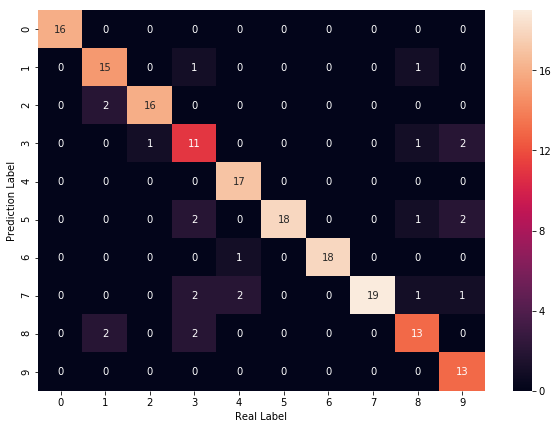

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:56 index:[5] real:5
#1 min_error:69 index:[3] real:2
#2 min_error:75 index:[8] real:8
#3 min_error:19 index:[0] real:0
#4 min_error:54 index:[1] real:1
#5 min_error:49 index:[7] real:7
#6 min_error:32 index:[6] real:6
#7 min_error:51 index:[3] real:3
#8 min_error:34 index:[2] real:2
#9 min_error:55 index:[1] real:1
#10 min_error:78 index:[7] real:7
#11 min_error:81 index:[7] real:4
#12 min_error:41 index:[6] real:6
#13 min_error:57 index:[3] real:3
#14 min_error:54 index:[1] real:1
#15 min_error:68 index:[3] real:3
#16 min_error:82 index:[5 7] real:9
#17 min_error:47 index:[1] real:1
#18 min_error:80 index:[7] real:7
#19 min_error:27 index:[6] real:6
#20 min_error:75 index:[8] real:8
#21 min_error:44 index:[4] real:4
#22 min_error:54 index:[3] real:3
#23 min_error:64 index:[1] real:1
#24 min_error:47 index:[4] real:4
#25 min_error:29 index:[0] real:0
#26 min_error:40 index:[5] real:5
#27 min_error:48 index:[3] real:3
#28 min_error:61 index:[6] real:6
#29 min_error:67 index

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9053803339517625
Avg Base Learner:0.7899097093382808


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    #print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

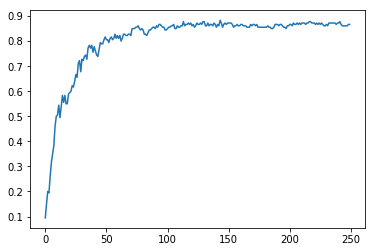

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:4556 Total connections::4816
